# **Customer Segmentation Analysis**

The dataset contains information from 2,000 individuals across various regions. It is derived from the purchasing behavior of these individuals when shopping in a physical FMCG store. The data has been collected through the loyalty cards they used during checkout.

Let's Begin!!

#### **Import all the necessary libraries**

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
import pickle

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

#### **Import the dataset**

In [101]:
df = pd.read_csv('segmentation data.csv', index_col = 0)
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


#### **Shape of the dataset**

In [102]:
df.shape

(2000, 7)

#### **Information of the dataset**

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


#### **Statistical Description of the dataset**

In [104]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


#### **Checking for Null Values**

In [105]:
df.isnull().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

#### **Checking for Duplicated Records**

In [106]:
df.duplicated().sum()

0

## **Data Visualization**

#### **Correlation Estimate**

In [107]:
# Pearson Correlation
correlation_matrix = df.corr()
print(correlation_matrix)

                      Sex  Marital status       Age  Education    Income  \
Sex              1.000000        0.566511 -0.182885   0.244838 -0.195146   
Marital status   0.566511        1.000000 -0.213178   0.374017 -0.073528   
Age             -0.182885       -0.213178  1.000000   0.654605  0.340610   
Education        0.244838        0.374017  0.654605   1.000000  0.233459   
Income          -0.195146       -0.073528  0.340610   0.233459  1.000000   
Occupation      -0.202491       -0.029490  0.108388   0.064524  0.680357   
Settlement size -0.300803       -0.097041  0.119751   0.034732  0.490881   

                 Occupation  Settlement size  
Sex               -0.202491        -0.300803  
Marital status    -0.029490        -0.097041  
Age                0.108388         0.119751  
Education          0.064524         0.034732  
Income             0.680357         0.490881  
Occupation         1.000000         0.571795  
Settlement size    0.571795         1.000000  


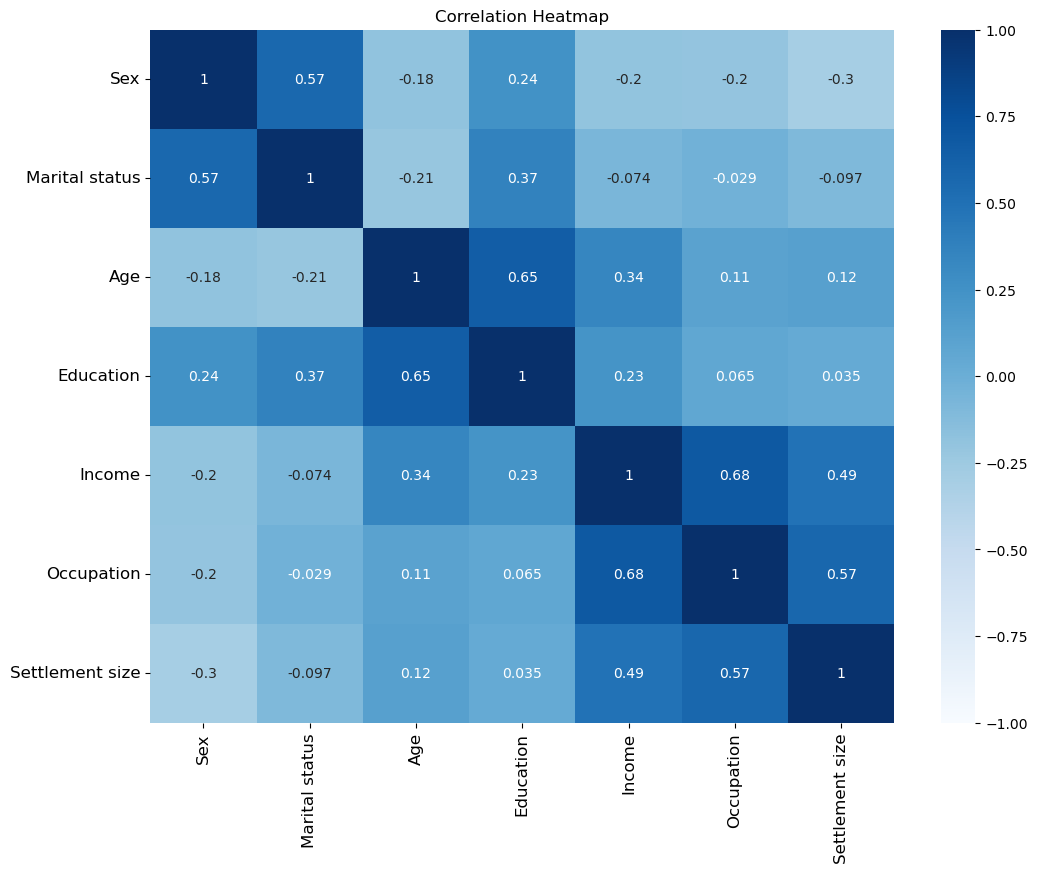

In [108]:
# Plotting the Correlation Matrix using Heatmap

plt.figure(figsize = (12, 9))
s = sns.heatmap(df.corr(),
               annot = True, 
               cmap = 'Blues',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

#### **Relationship between Age and Income**

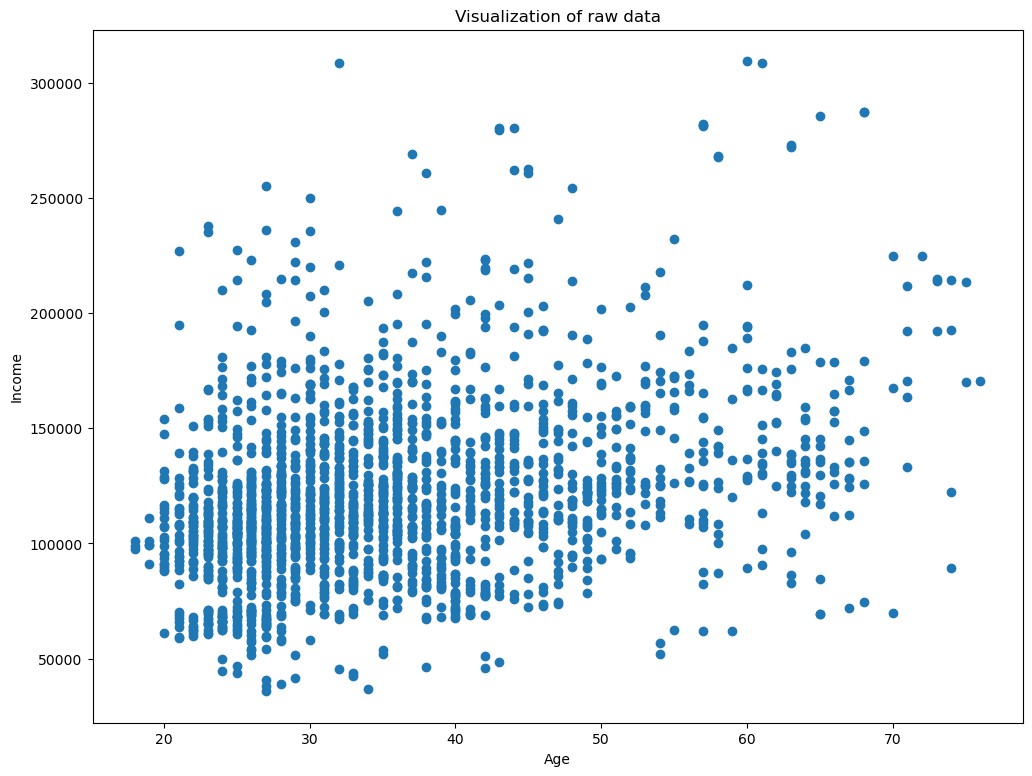

In [109]:
# scatter plot between Age and Income, located on positions 2 and 4 in our data set

plt.figure(figsize = (12, 9))
plt.scatter(df.iloc[:, 2], df.iloc[:, 4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data')
plt.show()

#### **Standardization of the data**

In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df)

## **Hierarchical Clustering**

In [111]:
# We are utilizing a specific type of Agglomerative Clustering known as the Ward Method. This approach focuses on minimizing variance. 
# In Sklearn, the default linkage method is set to "ward.
# The results are returned as a linkage matrix. 

from scipy.cluster.hierarchy import dendrogram, linkage

hier_clust = linkage(segmentation_std, method = 'ward')

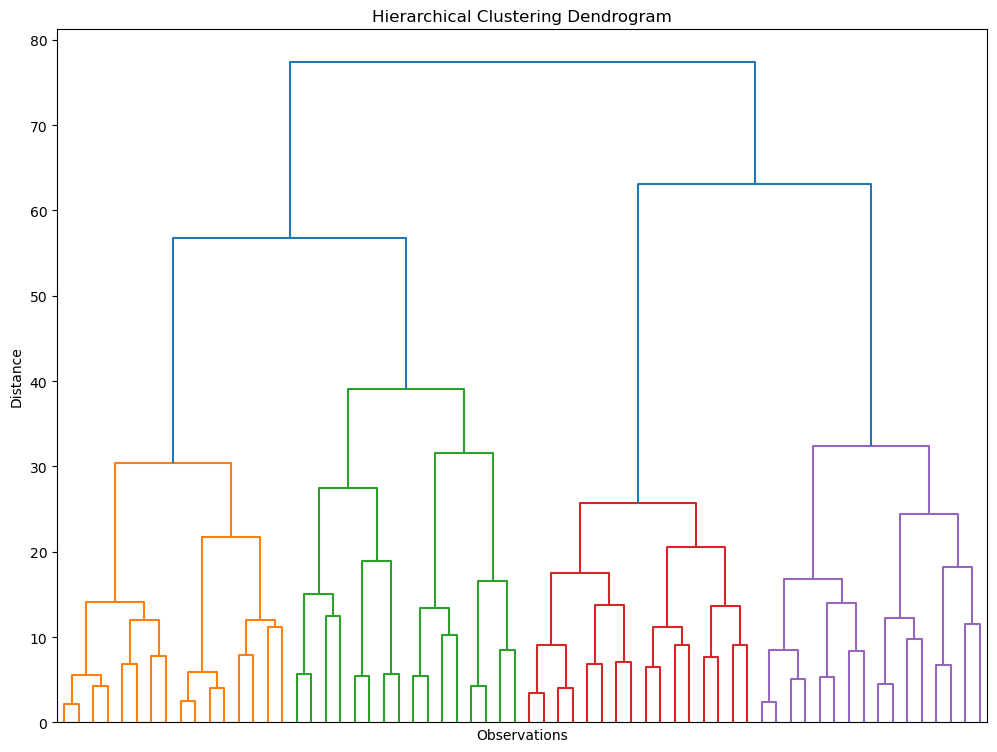

In [112]:
# We plot the results from the Hierarchical Clustering using a Dendrogram. 
# We truncate the dendrogram for better readability. The level p shows only the last p merged clusters
# We also omit showing the labels for each point.
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level', 
           p = 5, 
           show_leaf_counts = False, 
           no_labels = True)
plt.show()

## **K-Means Clustering**

In [113]:
# Perform K-means clustering. We consider 1 to 10 clusters, so our for loop runs 10 iterations.
# In addition we run the algortihm at many different starting points - k means plus plus. 
# And we set a random state for reproducibility.

from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

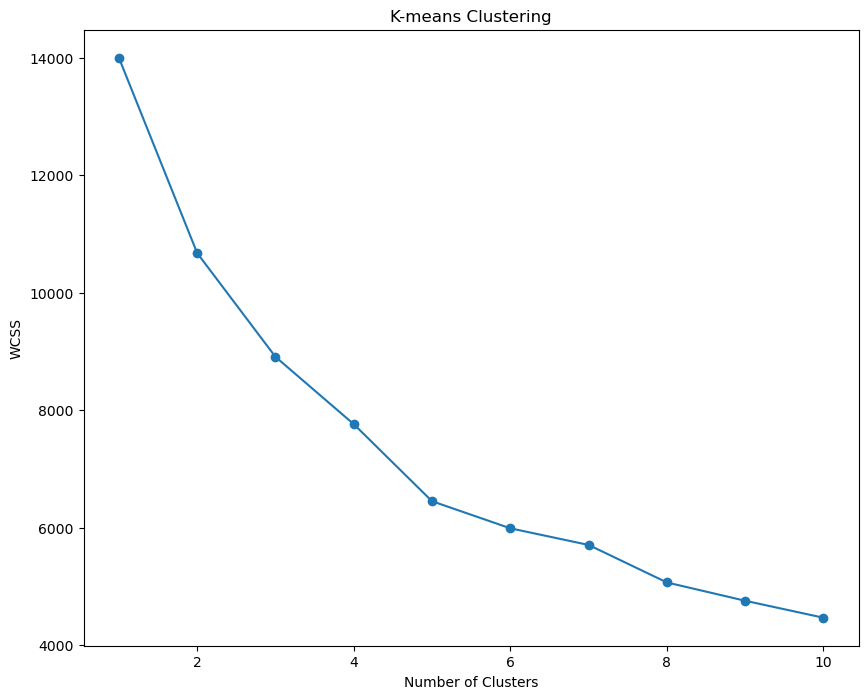

In [114]:
# Plot the Within Cluster Sum of Squares for the different number of clusters.
# From this plot we choose the number of clusters. 
# We look for a kink in the graphic, after which the descent of wcss isn't as pronounced.
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [115]:
# We run K-means with a fixed number of clusters. In our case 4.
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [116]:
# We divide our data into the four clusters.
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

### **Results**

In [117]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_segm_kmeans = df.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [118]:
# Calculate mean values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.066543,0.000000,33.240296,0.489834,109932.785582,0.639556,0.611830
1,0.868254,0.785714,32.928571,1.163492,98466.955556,0.384127,0.006349
2,0.691099,0.979058,29.060209,1.104712,126838.926702,1.107330,1.324607
3,0.149888,0.277405,49.192394,1.467562,160958.722595,1.364653,1.425056


In [119]:
# Compute the size and proportions of the four clusters
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','Sex']].groupby(['Segment K-means']).count()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()

In [120]:
df_segm_analysis.rename({0:'well-off',
                         1:'fewer-opportunities',
                         2:'standard',
                         3:'career focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
well-off,0.066543,0.000000,33.240296,0.489834,109932.785582,0.639556,0.611830,541,0.2705
fewer-opportunities,0.868254,0.785714,32.928571,1.163492,98466.955556,0.384127,0.006349,630,0.3150
standard,0.691099,0.979058,29.060209,1.104712,126838.926702,1.107330,1.324607,382,0.1910
career focused,0.149888,0.277405,49.192394,1.467562,160958.722595,1.364653,1.425056,447,0.2235


In [121]:
# Add the segment labels to our table
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'well-off', 
                                                                  1:'fewer opportunities',
                                                                  2:'standard', 
                                                                  3:'career focused'})

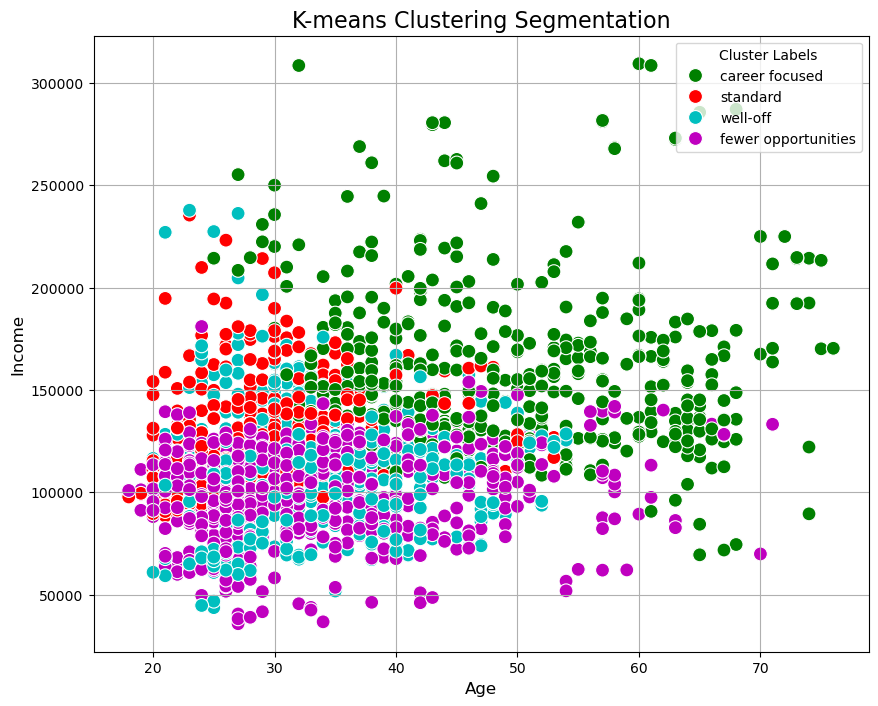

In [122]:
# Plot the results of the K-means algorithm
# Each point in the dataset is plotted and colored according to the cluster it has been assigned to.
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']

plt.figure(figsize=(10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_segm_kmeans['Labels'], palette=['g', 'r', 'c', 'm'], s=100)

plt.title('K-means Clustering Segmentation', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Income', fontsize=12)
plt.legend(title='Cluster Labels', loc='upper right')
plt.grid(True)
plt.show()


## **PCA**

In [123]:
# Employ PCA to find a subset of components, which explain the variance in the data.

from sklearn.decomposition import PCA

pca = PCA()

In [124]:
# Fit PCA with our standardized data.
pca.fit(segmentation_std)

PCA()

In [125]:
# The attribute shows how much variance is explained by each of the seven individual components.
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

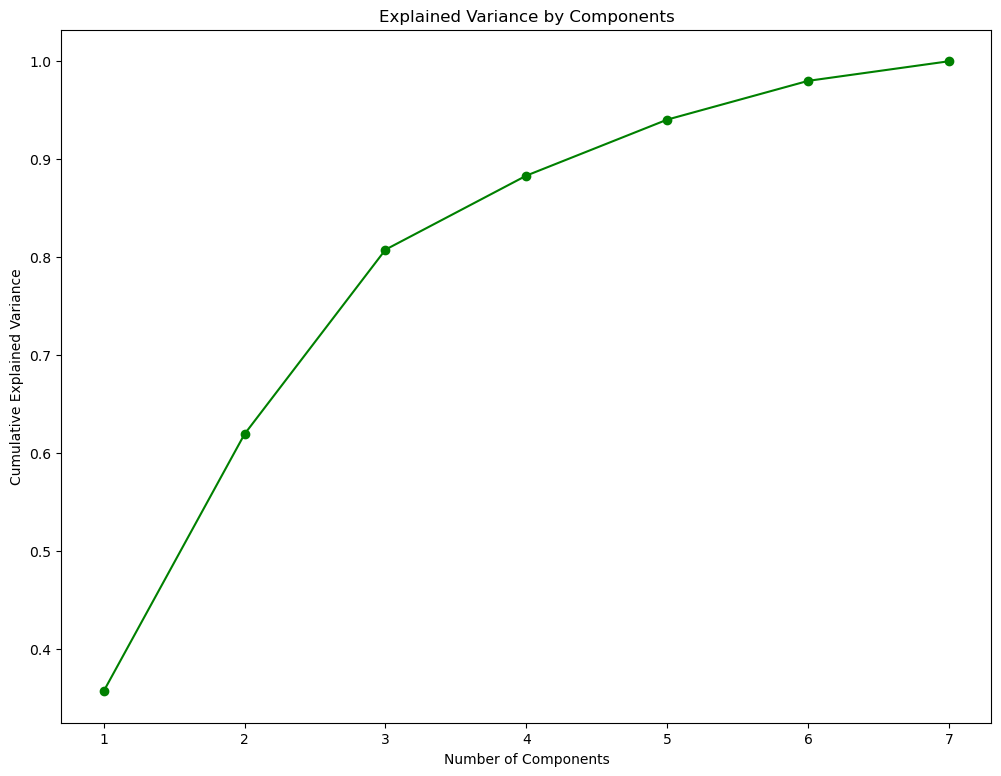

In [126]:
# Plot the cumulative variance explained by total number of components.
# On this graph we choose the subset of components we want to keep. 
# Generally, we want to keep around 80 % of the explained variance.
plt.figure(figsize = (12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', color='green')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [127]:
# We choose three components. 3 or 4 seems the right choice according to the previous graph.
pca = PCA(n_components = 3)

In [128]:
#Fit the model the our data with the selected number of components. In our case three.
pca.fit(segmentation_std)

PCA(n_components=3)

### **PCA Results**

In [129]:
# The components attribute shows the loadings of each component on each of the seven original features.
# The loadings are the correlations between the components and the original features. 
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [130]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


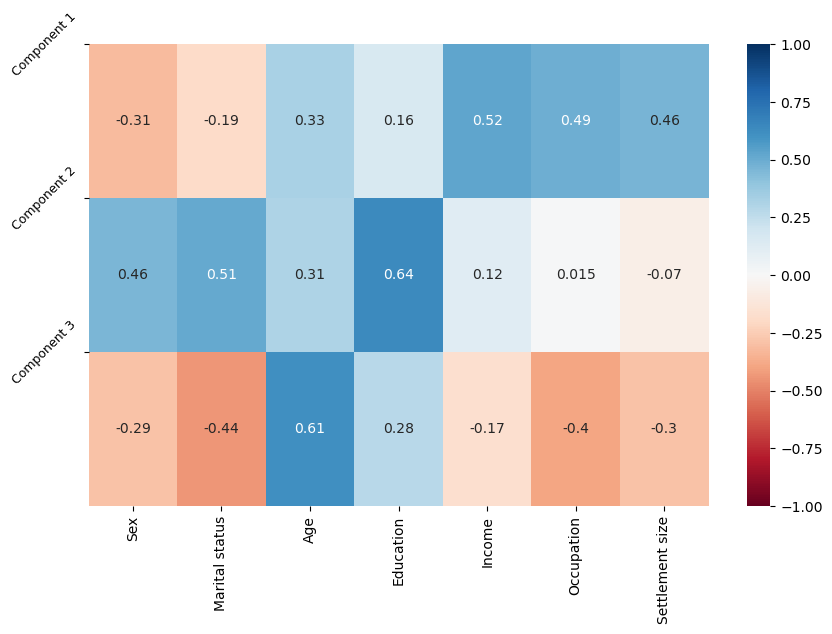

In [131]:
# Heat Map for Principal Components against original features. Again we use the RdBu color scheme and set borders to -1 and 1.
plt.figure(figsize=(10,6))
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 9)
plt.show()

In [132]:
pca.transform(segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [133]:
scores_pca = pca.transform(segmentation_std)

## **K-Means Clustering with PCA**

In [134]:
# We fit K means using the transformed data from the PCA.
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

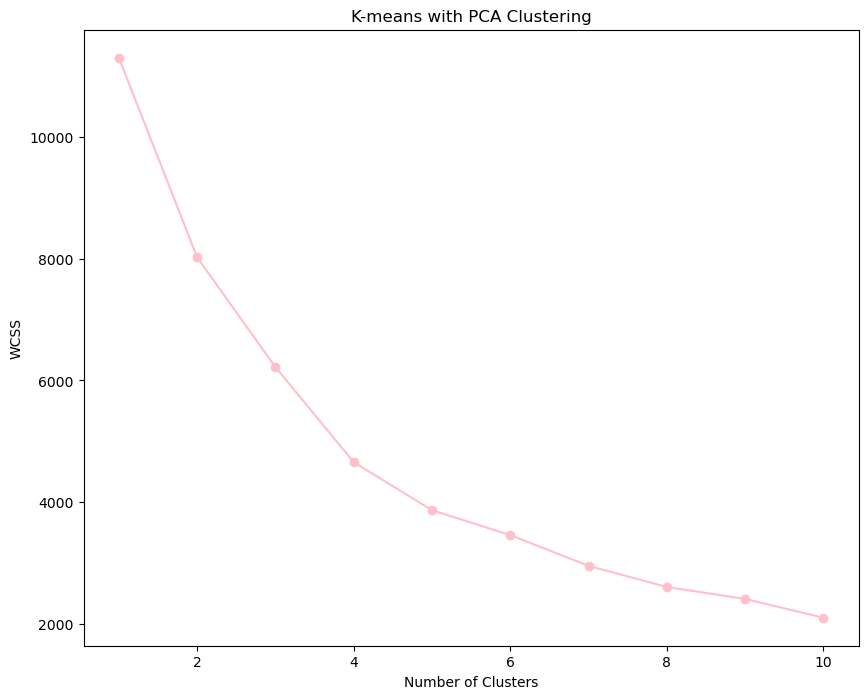

In [135]:
# Plot the Within Cluster Sum of Squares for the K-means PCA model. Here we make a decission about the number of clusters.
# Again it looks like four is the best option.
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', color="pink")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [136]:
# We have chosen four clusters, so we run K-means with number of clusters equals four. 
# Same initializer and random state as before.
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [137]:
# We fit our data with the k-means pca model
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

### **K-Means Clustering with PCA results**

In [138]:
# We create a new data frame with the original features and add the PCA scores and assigned clusters.
df_segm_pca_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
# The last column we add contains the pca k-means clustering labels.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [139]:
df_segm_pca_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,1
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,0
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,0


In [140]:
# We calculate the means by segments.
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.001661,0.041528,36.674419,0.684385,138482.186047,1.200997,1.255814,1.228891,-1.220013,0.041063
1,0.627869,0.454098,33.473770,0.944262,88824.154098,0.078689,0.009836,-1.607567,-0.110732,0.625678
2,0.762357,0.973384,27.889734,1.007605,119503.418251,1.055133,0.813688,-0.395592,0.518043,-1.204763
3,0.492366,0.683206,55.919847,2.129771,158400.877863,1.125954,1.099237,1.713376,2.021006,0.867641


In [141]:
# Calculate the size of each cluster and its proportion to the entire data set.
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'standard', 
                                                          1:'career focused',
                                                          2:'fewer opportunities', 
                                                          3:'well-off'})
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
standard,0.001661,0.041528,36.674419,0.684385,138482.186047,1.200997,1.255814,1.228891,-1.220013,0.041063,602,0.301
career focused,0.627869,0.454098,33.473770,0.944262,88824.154098,0.078689,0.009836,-1.607567,-0.110732,0.625678,610,0.305
fewer opportunities,0.762357,0.973384,27.889734,1.007605,119503.418251,1.055133,0.813688,-0.395592,0.518043,-1.204763,526,0.263
well-off,0.492366,0.683206,55.919847,2.129771,158400.877863,1.125954,1.099237,1.713376,2.021006,0.867641,262,0.131


In [142]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'standard', 
                                                          1:'career focused',
                                                          2:'fewer opportunities', 
                                                          3:'well-off'})

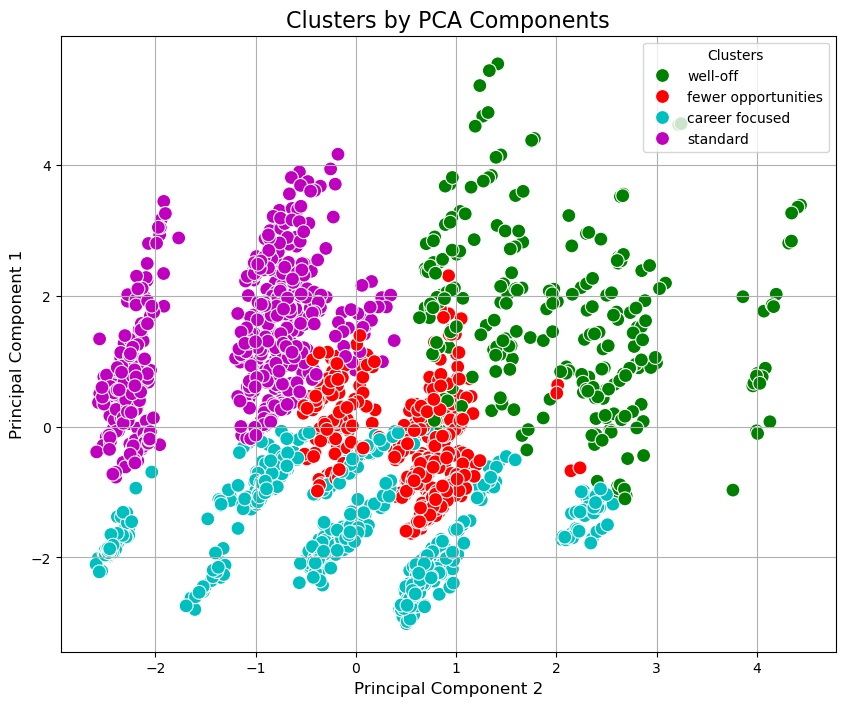

In [143]:
# Plot data using PCA components
# The Y-axis represents the first principal component, and the X-axis represents the second.
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']

plt.figure(figsize=(10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_segm_pca_kmeans['Legend'], palette=['g', 'r', 'c', 'm'], s=100)

plt.title('Clusters by PCA Components', fontsize=16)
plt.xlabel('Principal Component 2', fontsize=12)
plt.ylabel('Principal Component 1', fontsize=12)
plt.legend(title='Clusters', loc='upper right')
plt.grid(True)
plt.show()


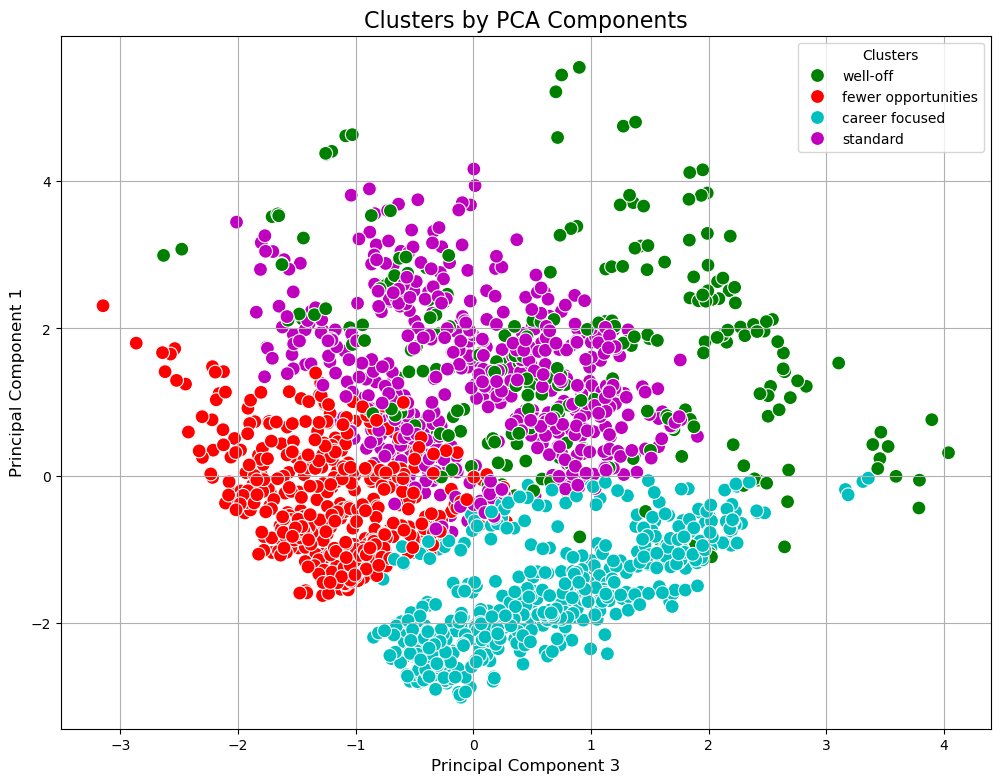

In [144]:
# The next two plots depict our data by the remaining components. The first plot shows Component 1 and 3.
# We can see there is a more significant overlap between the purple and green segments - that of the career-focused 
# and well-off respectively.
# The second plot shows the data by Components 2 and 3. 
# We can observe there is significant overlap between the purple and blue segments - the career-focused and fewer-opportunities.
# In general, it does not appear that we can separate he clusters easily on this graph. 
# The reason is that the second and third components contain less of the variance of the data set,
# which is why PCA returns the components in order of importance.
# Plot data using PCA components
# The Y-axis represents the first principal component, and the X-axis represents the third principal component.
x_axis_1 = df_segm_pca_kmeans['Component 3']
y_axis_1 = df_segm_pca_kmeans['Component 1']

plt.figure(figsize=(12, 9))
sns.scatterplot(x=x_axis_1, y=y_axis_1, hue=df_segm_pca_kmeans['Legend'], palette=['g', 'r', 'c', 'm'], s=100)

plt.title('Clusters by PCA Components', fontsize=16)
plt.xlabel('Principal Component 3', fontsize=12)
plt.ylabel('Principal Component 1', fontsize=12)
plt.legend(title='Clusters', loc='upper right')
plt.grid(True)
plt.show()


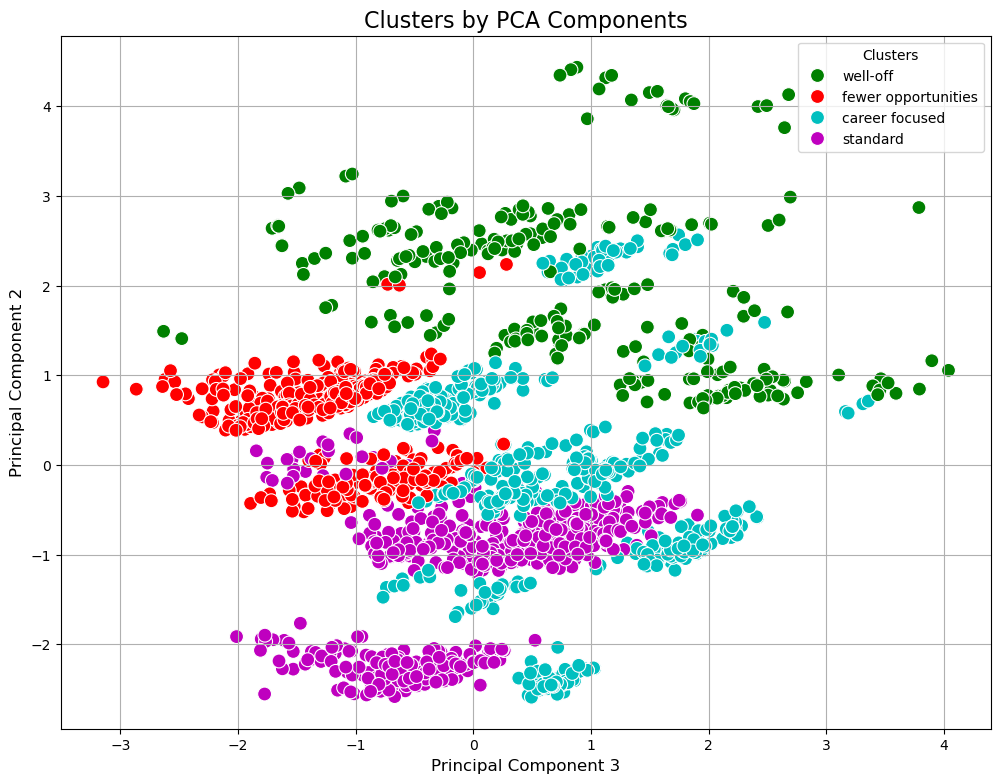

In [145]:
# Plot data using PCA components
# The Y-axis represents the second principal component, and the X-axis represents the third principal component.
x_axis_1 = df_segm_pca_kmeans['Component 3']
y_axis_1 = df_segm_pca_kmeans['Component 2']

plt.figure(figsize=(12, 9))
sns.scatterplot(x=x_axis_1, y=y_axis_1, hue=df_segm_pca_kmeans['Legend'], palette=['g', 'r', 'c', 'm'], s=100)

plt.title('Clusters by PCA Components', fontsize=16)
plt.xlabel('Principal Component 3', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Clusters', loc='upper right')
plt.grid(True)
plt.show()


### **Export Data**

In [147]:
pickle.dump(scaler, open('scaler.pickle', 'wb'))

In [148]:
pickle.dump(pca, open('pca.pickle', 'wb'))

In [149]:
pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))